# Proyecto Mineria

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [221]:
df = pd.read_csv("marketing_campaign.csv", sep=";")

In [222]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 29)


In [223]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [224]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)

In [225]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(living_status)

In [226]:
df['Age'] = 2022 - df['Year_Birth']

In [227]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [228]:
# df['Average_Spend'] = round(((df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']), 2)

In [229]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [230]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [231]:
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = round((df['NumWebVisitsMonth'] / 12), 2)

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = round((df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])), 2)

Dropeamos y Limpiamos

In [232]:
df = df.dropna()

In [233]:
df.duplicated().sum()

0

Outliers

In [234]:
df = pd.get_dummies(df, columns=["Education_Level","Living_Status"])

In [235]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID','Education','Marital_Status']
df = df.drop(to_drop, axis=1)

In [236]:
df['Income_int'] = df['Income'].astype(int)
df.drop('Income', axis=1)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Income_int
0,0,0,58,635,88,546,172,88,88,3,...,0,1617,0.58,0.36,1,0,0,0,1,58138
1,1,1,38,11,1,6,2,1,6,2,...,1,27,0.42,0.25,1,0,0,0,1,46344
2,0,0,26,426,49,127,111,21,42,1,...,0,776,0.33,0.40,1,0,0,0,1,71613
3,1,0,26,11,4,20,10,3,5,2,...,1,53,0.50,0.33,1,0,0,0,1,26646
4,1,0,94,173,43,118,46,27,15,5,...,1,422,0.42,0.36,1,0,0,0,1,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,46,709,43,182,42,118,247,2,...,1,1341,0.42,0.56,1,0,0,0,1,61223
2236,2,1,56,406,0,30,0,0,8,7,...,1,444,0.58,0.53,1,0,0,0,1,64014
2237,0,0,91,908,48,217,32,12,24,1,...,0,1241,0.50,0.11,1,0,0,0,1,56981
2238,0,1,8,428,30,214,80,30,61,2,...,1,843,0.25,0.29,1,0,0,0,1,69245


In [237]:
inf_check = df.applymap(np.isinf)

# Sumar el número de infinitos en cada columna
inf_count = inf_check.sum()

# Mostrar las columnas que contienen infinitos
columns_with_inf = inf_count[inf_count > 0]
print("Columnas con infinitos:")
print(columns_with_inf)

Columnas con infinitos:
Series([], dtype: int64)


In [238]:
from sklearn.neighbors import LocalOutlierFactor

## Outliers: Se realiza un LOF con k = 10 y umbral -1.5
lof = LocalOutlierFactor(n_neighbors=10, metric='euclidean')
labels = lof.fit_predict(df)
scores = lof.negative_outlier_factor_

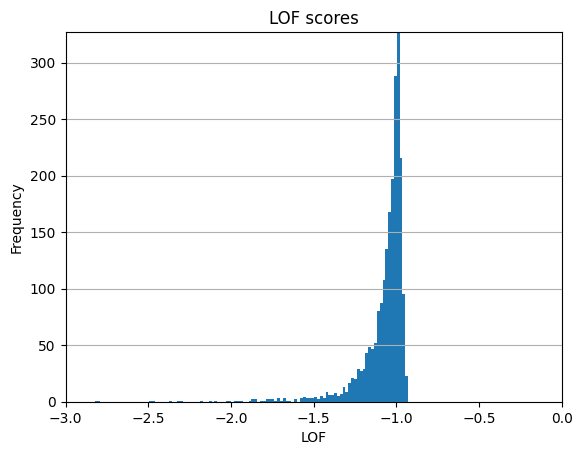

In [243]:
def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    plt.xlim(-3, 0)

plot_hist(scores, 'LOF scores')

In [244]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold, points

threshold, outliers = lof_threshold(-1.5,scores)
print(f'Datos bajo el umbral de corte: {threshold}')
print(f'Cantidad de outliers: {len(outliers)}')

Datos bajo el umbral de corte: 0.034389140271493215
Cantidad de outliers: 76


In [245]:
# Recuperado de clase
lof = LocalOutlierFactor(n_neighbors=10, metric='euclidean', contamination=threshold)
labels = lof.fit_predict(df)
indices = list(np.where(labels==1)[0])

# Crear un nuevo DataFrame con las filas que no son outliers
dataset_limpio = df.iloc[indices].reset_index(drop=True)

# Imprimir la forma del DataFrame resultante
print(dataset_limpio.shape)

(2134, 35)


DIvisión del df clustering

In [249]:
df_clustering = dataset_limpio[["Education_Level_High", "Education_Level_Low", "Education_Level_Middle",
                    "Living_Status_Living Alone","Living_Status_Living with Others",'Age',"Is_Parent", "Income_int"]]
df_clustering.head()

,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Age,Is_Parent,Income_int
0,1,0,0,0,1,65,0,58138
1,1,0,0,0,1,68,1,46344
2,1,0,0,0,1,57,0,71613
3,1,0,0,0,1,38,1,26646
4,1,0,0,0,1,41,1,58293


In [250]:
from sklearn.preprocessing import StandardScaler


# Select the numerical columns to scale
num_cols = ['Income_int',  'Age']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df_clustering[num_cols] = scaler.fit_transform(df_clustering[num_cols])

C:\Users\U\AppData\Local\Temp\ipykernel_1580\2549497892.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[num_cols] = scaler.fit_transform(df_clustering[num_cols])


PCA

In [254]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=8)

# Fit and transform the data
pca.fit_transform(df_clustering)

array([[ 9.83367683e-01,  3.94294210e-01,  2.99994130e-01, ...,
        -3.26056524e-03,  8.53669224e-14,  1.74227903e-18],
       [ 5.92401851e-01,  1.15157152e+00, -1.61973500e-01, ...,
        -2.54468587e-03,  9.94273291e-16, -1.27116059e-17],
       [ 1.02029137e+00, -5.24645856e-01,  1.98872066e-01, ...,
        -4.97782560e-03, -1.25909149e-16, -7.56241246e-17],
       ...,
       [-3.94214214e-01, -1.04860399e+00,  1.63554902e-01, ...,
        -7.63895139e-03, -9.28273684e-17, -8.24841824e-18],
       [ 1.30075456e+00,  3.04649909e-01, -2.65664368e-01, ...,
        -3.33728659e-03,  1.32667331e-17, -2.54957981e-18],
       [ 8.25952499e-01,  9.45392377e-01, -1.88167489e-01, ...,
        -2.66604612e-03, -2.31974723e-17, -4.06368390e-18]])

In [255]:
# Código rescatado de clase.
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 95% de la varianza del dataset original
print(min_var(0.95, pca.explained_variance_ratio_))

4


In [256]:
pca_reducido = PCA(n_components=4)
X_Reducido_Cluster = pca_reducido.fit_transform(df_clustering)

In [257]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(X_Reducido_Cluster)
    silhouette_scores.append(silhouette_score(X_Reducido_Cluster, preds))

best_k = list_k[np.argmax(silhouette_scores)]

C:\Users\U\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\U\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\U\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\U\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

In [258]:
best_k

3

In [259]:
silhouette_scores

[0.32723900478038126,
 0.34189612642541894,
 0.3073925494184055,
 0.31082886353472533,
 0.2995870579793588,
 0.3133421635985149,
 0.30523634505221997,
 0.31183356544598356]

C:\Users\U\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


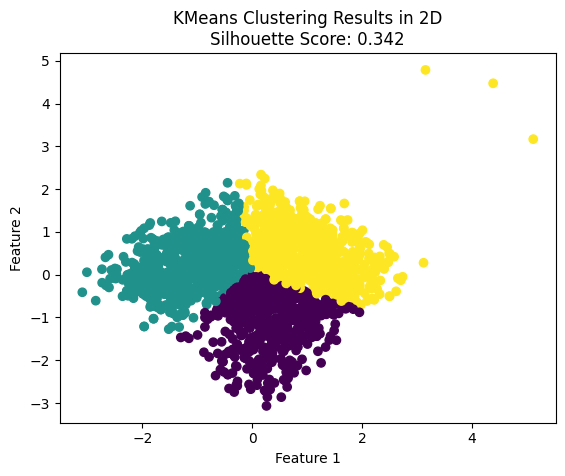

In [260]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_Reducido_Cluster)

# Get the predictions
predictions = kmeans.predict(X_Reducido_Cluster)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(X_Reducido_Cluster, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X_Reducido_Cluster, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(X_Reducido_Cluster, predictions)

# Visualize the results in 2D
plt.scatter(X_Reducido_Cluster[:, 0], X_Reducido_Cluster[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

Analisis

In [261]:
df_clustering['segmentacion_cliente'] = predictions
df_clustering.head()

C:\Users\U\AppData\Local\Temp\ipykernel_1580\4184206296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['segmentacion_cliente'] = predictions


,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Age,Is_Parent,Income_int,segmentacion_cliente
0,1,0,0,0,1,0.985416,0,0.297004,2
1,1,0,0,0,1,1.235312,1,-0.283474,2
2,1,0,0,0,1,0.319026,0,0.960218,0
3,1,0,0,0,1,-1.263651,1,-1.252971,1
4,1,0,0,0,1,-1.013754,1,0.304633,0


In [262]:
# Para ver los clientes en el clúster 0, por ejemplo:
cluster_0 = df_clustering[df_clustering['segmentacion_cliente'] == 0]

# Para ver los clientes en el clúster 1:
cluster_1 = df_clustering[df_clustering['segmentacion_cliente'] == 1]

cluster_2 =df_clustering[df_clustering['segmentacion_cliente'] == 2]

In [263]:
cluster_0

,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Age,Is_Parent,Income_int,segmentacion_cliente
2,1,0,0,0,1,0.319026,0,0.960218,0
4,1,0,0,0,1,-1.013754,1,0.304633,0
5,1,0,0,0,1,0.152428,1,0.512333,0
6,1,0,0,0,1,-0.180767,1,0.173811,0
23,1,0,0,0,1,-0.597261,1,0.061791,0
...,...,...,...,...,...,...,...,...,...
2118,1,0,0,0,1,-1.097053,0,1.165162,0
2121,1,0,0,0,1,-0.097468,1,0.272592,0
2122,1,0,0,0,1,0.069129,1,0.317479,0
2123,1,0,0,0,1,-0.847157,1,0.574545,0


In [264]:
cluster_1

,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Age,Is_Parent,Income_int,segmentacion_cliente
3,1,0,0,0,1,-1.263651,1,-1.252971,1
7,1,0,0,0,1,-1.346949,1,-0.917895,1
8,1,0,0,0,1,-0.430663,1,-1.070619,1
9,0,0,1,0,1,-0.597261,0,-2.195301,1
12,1,0,0,0,1,-1.513547,0,-1.711832,1
...,...,...,...,...,...,...,...,...,...
2120,1,0,0,0,1,0.485623,1,-0.912579,1
2125,1,0,0,0,1,-0.264066,1,-1.361842,1
2126,1,0,0,0,1,-1.263651,1,-2.022447,1
2127,1,0,0,0,1,-1.430248,0,-1.244604,1


In [265]:
cluster_2

,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Age,Is_Parent,Income_int,segmentacion_cliente
0,1,0,0,0,1,0.985416,0,0.297004,2
1,1,0,0,0,1,1.235312,1,-0.283474,2
10,1,0,0,0,1,0.818818,0,0.537927,2
11,1,0,0,0,1,1.401909,1,0.356854,2
13,1,0,0,0,1,1.901702,0,1.510821,2
...,...,...,...,...,...,...,...,...,...
2124,1,0,0,0,1,0.568922,1,0.288588,2
2129,1,0,0,0,1,0.152428,1,0.448842,2
2130,1,0,0,0,1,1.901702,1,0.586210,2
2132,1,0,0,0,1,1.068714,1,0.843670,2


# Media y desviación estándar originales
mean_original = 100
std_original = 20

# Realiza la desestandarización
df_desestandarizado = df_estandarizado * std_original + mean_original